In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv("natural_gas_prices.csv")
data["Month"] = pd.to_datetime(data["Month"], infer_datetime_format = True)
data = data.set_index("Month")

In [3]:
data

,Price
Month,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25
...,...
2019-08-01,2.22
2019-09-01,2.56
2019-10-01,2.33


# Original Data Plot

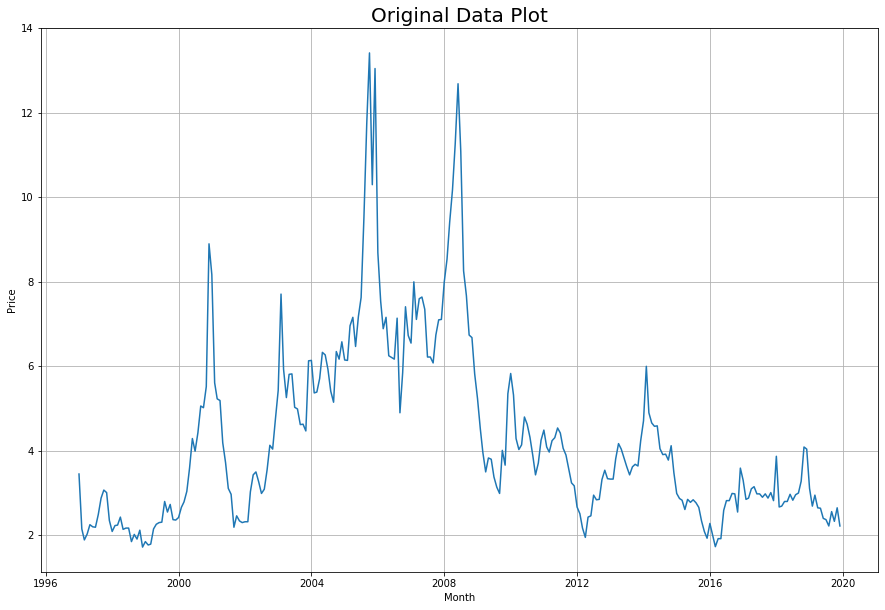

In [4]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Original Data Plot", size = 20)
plt.plot(data["Price"])

# Dickey Fuller Test

In [5]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [6]:
result = adfuller(data["Price"])
print("ADF Statistic: %f" %result[0])
print("p-value: %f" %result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" %(key, value))

if result[0] < result[4]["5%"]:
    print("At 5% level of significance - Reject H0 - Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - Time series is non-stationary")

ADF Statistic: -2.063891
p-value: 0.259280
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
At 5% level of significance - Failed to reject H0 - Time series is non-stationary


# Making It Stationary

In [7]:
data["Price first difference"] = data["Price"] - data["Price"].shift(1)
data["Price seasonal difference"] = data["Price"] - data["Price"].shift(12)

#Dickey Fuller Test
result1 = adfuller(data["Price first difference"].dropna())
print("ADF Statistic: %f" %result1[0])
print("p-value: %f" %result1[1])
print("Critical Values:")
for key, value in result1[4].items():
    print("\t%s: %.3f" %(key, value))

if result1[0] < result1[4]["5%"]:
    print("At 5% level of significance - Reject H0 - Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - Time series is non-stationary")

ADF Statistic: -7.457893
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573
At 5% level of significance - Reject H0 - Time series is stationary


In [8]:
data.head(15)

,Price,Price first difference,Price seasonal difference
Month,,,
1997-01-01,3.45,NaN,NaN
1997-02-01,2.15,-1.30,NaN
1997-03-01,1.89,-0.26,NaN
1997-04-01,2.03,0.14,NaN
1997-05-01,2.25,0.22,NaN
1997-06-01,2.20,-0.05,NaN
1997-07-01,2.19,-0.01,NaN
1997-08-01,2.49,0.30,NaN
1997-09-01,2.88,0.39,NaN


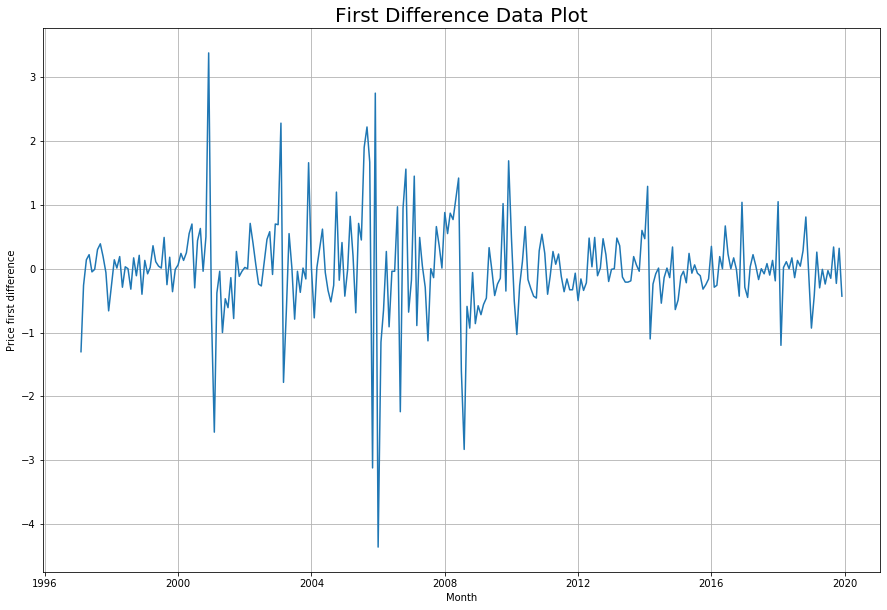

In [9]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Price first difference")
plt.title("First Difference Data Plot", size = 20)
plt.plot(data["Price first difference"])

# 12 pt. Centred Moving Average Trend

In [18]:
data2 = pd.read_csv("natural_gas_prices_2.csv")
data2["Month"] = pd.to_datetime(data2["Month"], infer_datetime_format = True)
data2 = data2.set_index("Month")
data2.head(10)

,Price,12_MA_uncen,12_MA_cen
Month,,,
1997-01-01,3.45,NaN,NaN
1997-02-01,2.15,NaN,NaN
1997-03-01,1.89,NaN,NaN
1997-04-01,2.03,NaN,NaN
1997-05-01,2.25,2.496667,NaN
1997-06-01,2.20,2.383333,2.440000
1997-07-01,2.19,2.390000,2.386667
1997-08-01,2.49,2.419167,2.404583
1997-09-01,2.88,2.452500,2.435833


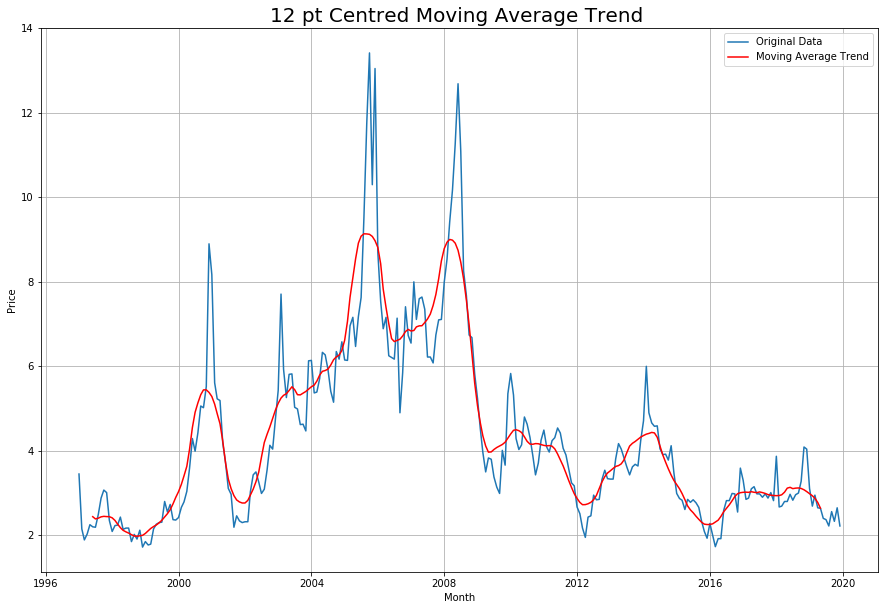

In [19]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("12 pt Centred Moving Average Trend ",size=20)
plt.plot(data2["Price"], label = "Original Data")
plt.plot(data2["12_MA_cen"], color = "Red", label = "Moving Average Trend")
plt.legend(loc="best")

# Decomposition of Trend and Seasonality

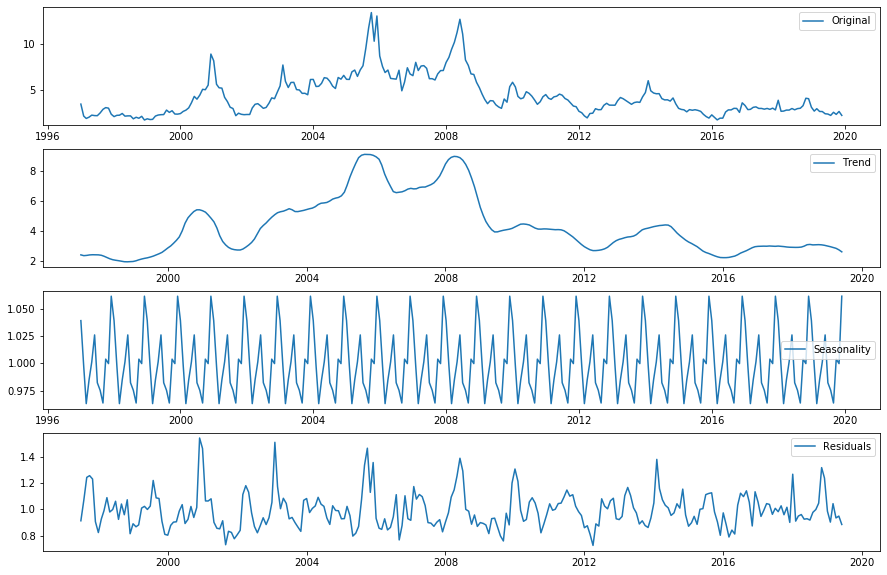

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Price"], model = "multiplicative")
plt.figure(figsize = (15,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data["Price"], label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc = "best")

# Train Test Split

In [22]:
from sklearn.metrics import mean_squared_error

data_train = data[:220]
data_test = data[220:]

In [25]:
data_train.head()

,Price,Price first difference,Price seasonal difference
Month,,,
1997-01-01,3.45,NaN,NaN
1997-02-01,2.15,-1.30,NaN
1997-03-01,1.89,-0.26,NaN
1997-04-01,2.03,0.14,NaN
1997-05-01,2.25,0.22,NaN


In [26]:
data_test.head()

,Price,Price first difference,Price seasonal difference
Month,,,
2015-05-01,2.85,0.24,-1.73
2015-06-01,2.78,-0.07,-1.81
2015-07-01,2.84,0.06,-1.21
2015-08-01,2.77,-0.07,-1.14
2015-09-01,2.66,-0.11,-1.26


# Holt Winters Exponential Smoothing

C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


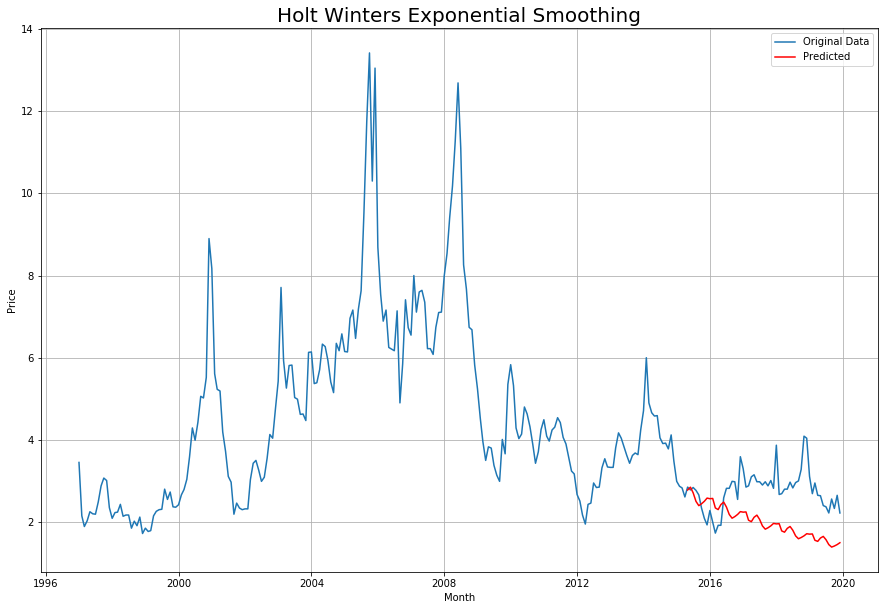

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data_train["Price"], trend = "mul", seasonal = "mul", seasonal_periods = 12)
fit = model.fit()
pred = fit.predict(start = 220, end = 275)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(pred, label = "Predicted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Holt Winters Exponential Smoothing", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data_test["Price"],pred))

1.0126051880511897

# ACF & PACF

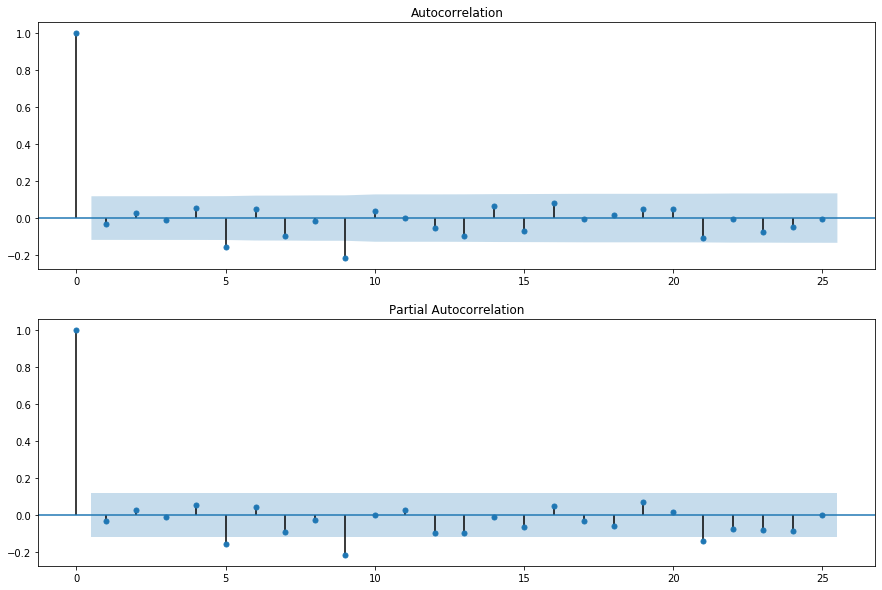

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["Price first difference"].dropna(), ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["Price first difference"].dropna(), ax = ax2)

# SARIMA

C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


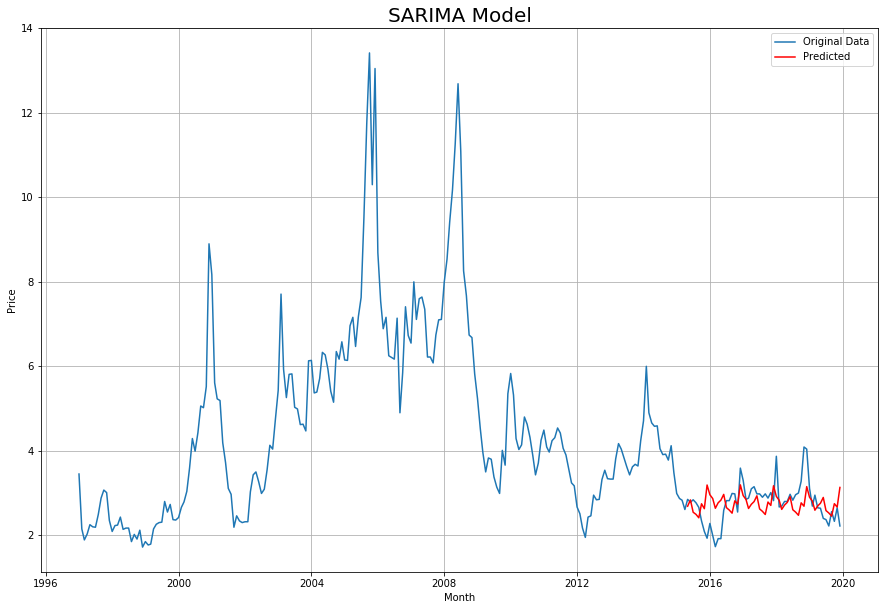

In [33]:
import statsmodels.api as sm

model1 = sm.tsa.statespace.SARIMAX(data_train["Price"], order = (1,1,1), seasonal_order = (1,1,1,12))
fit1 = model1.fit()
pred1 = fit1.predict(start = 220, end = 275)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(pred1, label = "Predicted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("SARIMA Model", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data_test["Price"],pred1))

0.4961279611050855

# Forecast for 2020 & 2021

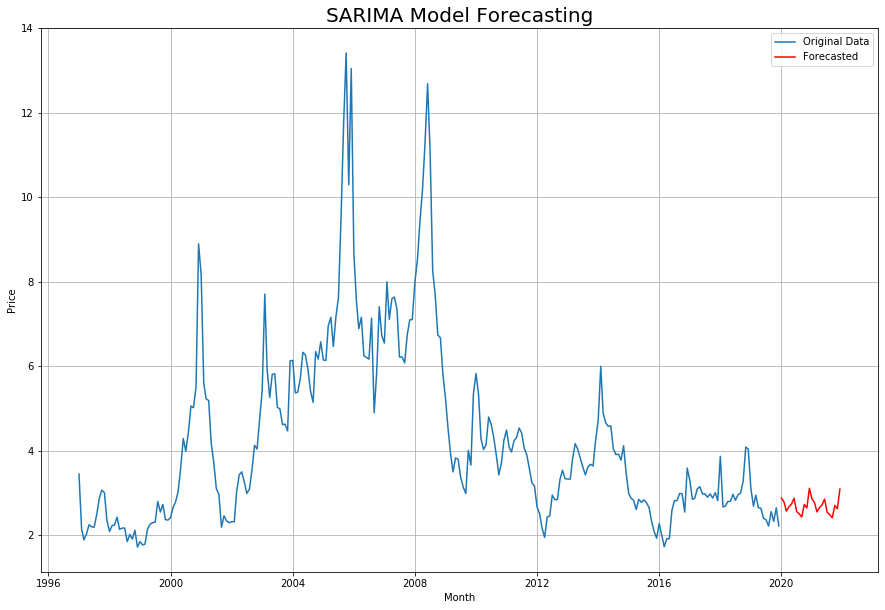

In [36]:
forecast = fit1.predict(start = 276, end = 299)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(forecast, label = "Forecasted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("SARIMA Model Forecasting", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

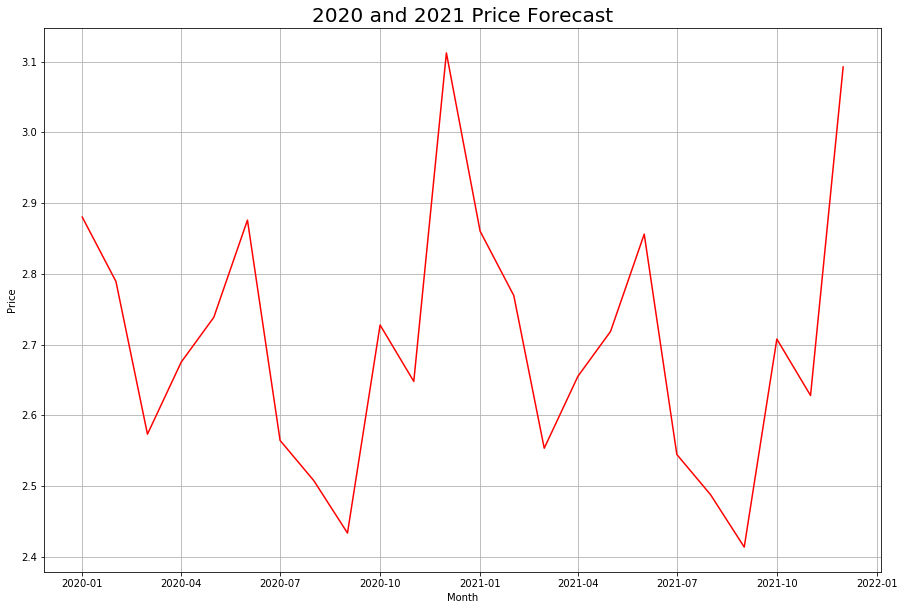

In [40]:
plt.figure(figsize = (15,10))
plt.plot(forecast, color = "red")
plt.title("2020 and 2021 Price Forecast", size = 20)
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid(True)

In [39]:
forecast_20_21 = pd.DataFrame(forecast, columns = ["Forecasted Price"])
forecast_20_21

,Forecasted Price
2020-01-01,2.880208
2020-02-01,2.789136
2020-03-01,2.573309
2020-04-01,2.675023
2020-05-01,2.738397
2020-06-01,2.875911
2020-07-01,2.564475
2020-08-01,2.507681
2020-09-01,2.433567
2020-10-01,2.727618


In [41]:
forecast_20_21.describe()

,Forecasted Price
count,24.000000
mean,2.700511
std,0.183952
min,2.413680
25%,2.561712
50%,2.691377
75%,2.805858
max,3.112230
